In [51]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# 2^16 Elements, Random

In [52]:
tk = th.Thicket.from_caliperreader(glob("cali/p*-n65536-i0.cali") + glob("cali/p*-s65536-t0.cali") + glob("cali/SS-MPI-i0-*-s65536.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", "Variance time/rank", "Retiring", "Backend bound","Frontend bound","Bad speculation" ], axis=1)#,"Avg time/rank", "Min time/rank", "Max time/rank", "Total time", "Avg GPU time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"
tk.dataframe

Avg time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              341992576        0.193970   
                                                  505169360        0.548888   
                                                  1079358870       0.222814   
                                                  1448663952       6.754919   
                                                  1494347991       1.044022   
                                                  1534034680       0.105209   
                                                  2042790835       0.116669   
                                                  2295855072       0.139860   
                                                  2388723642       0.363639   
                                                  2485678761       4.166670   
                                                  2496771773       1.454722   
                                                  2715298778       0.100019   
                                                  2744457808       0.032089   
                                                  3107284628       0.101635   
                                                  3191887980       0.190138   
                                                  3199725366       2.634074   
                                                  3359845327       0.101184   
                                                  3509463072       1.621610   
                                                  3530273106       0.821207   
                                                  3540033303       3.335252   
                                                  3570273308       0.113782   
                                                  3627305261       0.322819   
                                                  3703944876       2.771503   
                                                  3786729070       0.019736   
                                                  3793546341       0.023950   
                                                  3882162149       0.119139   
                                                  3963297246       0.029593   
                                                  3982814741       0.027357   
                                                  4155594884       0.121028   
                                                  4247724612       0.099775   
{'name': 'comm', 'type': 'function'}              341992576        0.188499   
                                                  505169360        0.000978   
                                                  1079358870       0.213736   
                                                  1448663952       0.152080   
                                                  1494347991       0.008058   
                                                  1534034680       0.096784   
                                                  2042790835       0.110621   
                                                  2295855072       0.134174   
                                                  2388723642       0.000970   
                                                  2485678761       0.102071   
                                                  2496771773       1.436935   
                                                  2715298778       0.070663   
                                                  2744457808       0.024244   
                                                  3107284628       0.090357   
                                                  3191887980       0.181222   
                                                  3199725366       0.014302   
                                                  3359845327       0.047734   
                                                  3509463072       0.025632   
                                                  3530273106       0.006526   
                                 

In [53]:
gb = tk.groupby("Algorithm")

3  thickets created...
{'Bitonic Sort': <thicket.thicket.Thicket object at 0x2b01f7ee6940>, 'Merge Sort': <thicket.thicket.Thicket object at 0x2b02223a35b0>, 'SampleSort': <thicket.thicket.Thicket object at 0x2b021b6d56a0>}


In [54]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [55]:
ctk.dataframe = ctk.dataframe.reset_index().drop(("node"), axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

<ipython-input-55-9c519a2558e5>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctk.dataframe = ctk.dataframe.reset_index().drop(("node"), axis=1)


In [56]:
function_names = set(ctk.dataframe.index.get_level_values("name"))
num_threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
input_sizes = sorted(list(set(ctk.dataframe.columns.get_level_values(0))))


In [57]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    lines = ax.plot(
        df,
        marker='o',
    )
    legend_labels = [label[0] for label in df.columns]
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(lines, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    #plt.yscale("log", base=10)
   # plt.xscale("log", base=2)
    plt.xticks(num_threads)
    plt.show()
    return fig, ax

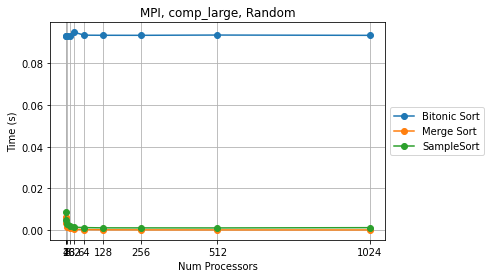

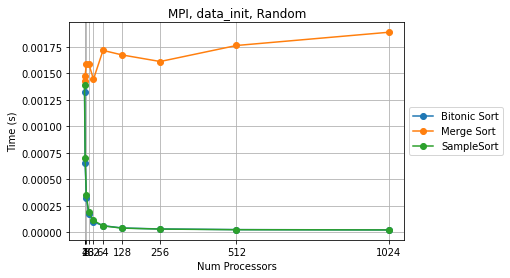

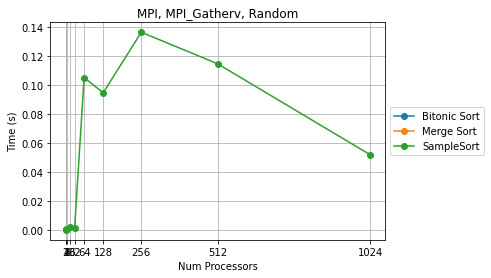

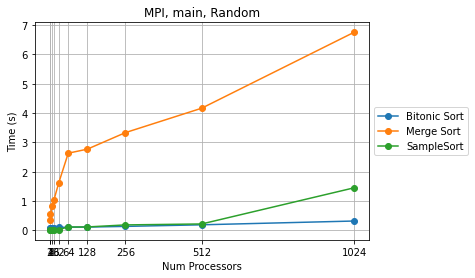

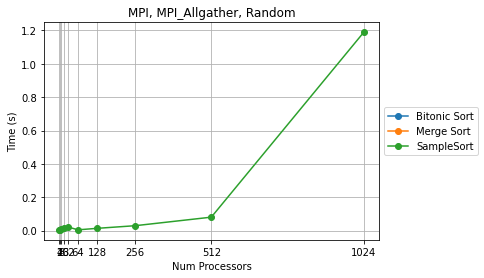

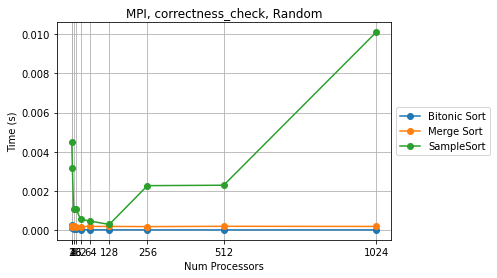

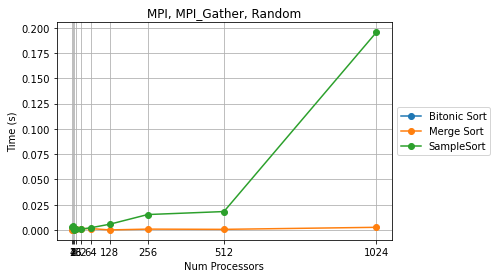

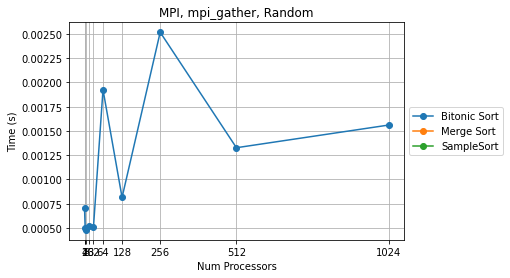

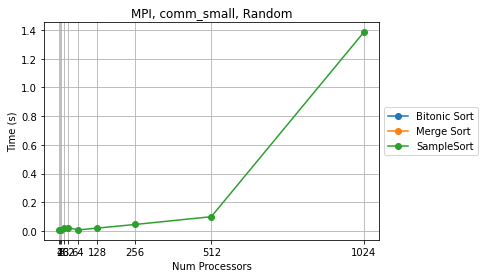

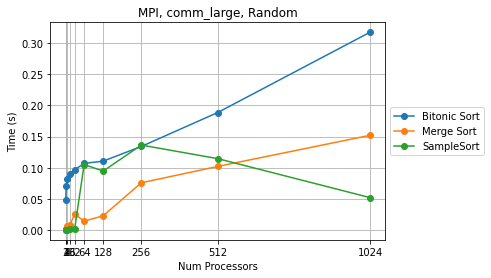

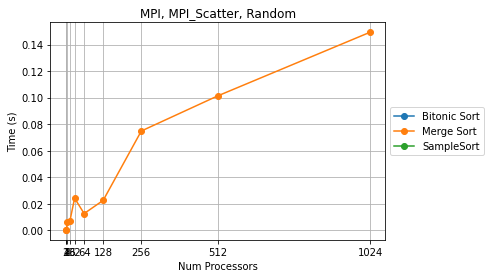

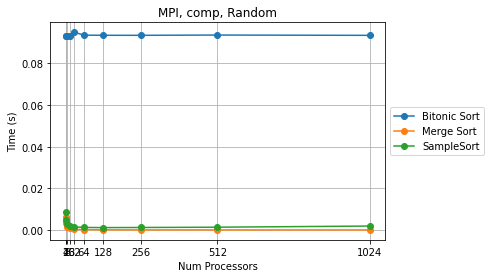

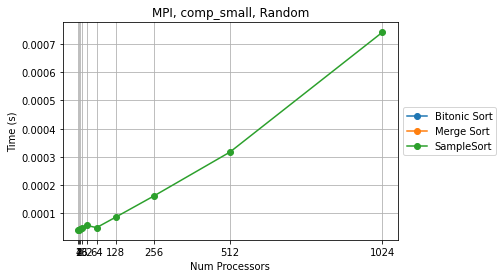

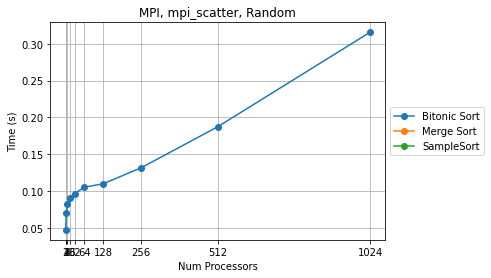

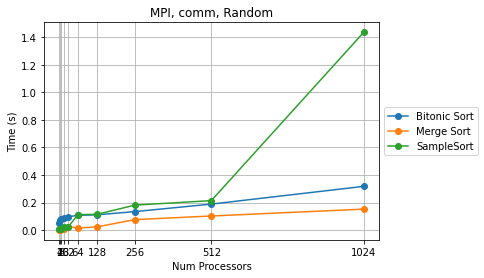

In [58]:
for name in function_names:
#         if name == 'main' or name == 'main_function':
#             continue
        plot_mpl(
            df=ctk.dataframe.loc[name],
            title=f"MPI, {name}, Random", 
            xlabel="Num Processors",
            ylabel="Time (s)",
        )

In [59]:
function_names

{'MPI_Allgather',
 'MPI_Gather',
 'MPI_Gatherv',
 'MPI_Scatter',
 'comm',
 'comm_large',
 'comm_small',
 'comp',
 'comp_large',
 'comp_small',
 'correctness_check',
 'data_init',
 'main',
 'mpi_gather',
 'mpi_scatter'}